# Brainstorming for interesting features

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
ballots_dataset = pd.read_csv('./git/VBM_Rejection_Factors/Ariel/ballots_dataset.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3,12,23,25,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
ballots_dataset.drop(columns='Unnamed: 0', axis=1, inplace=True)

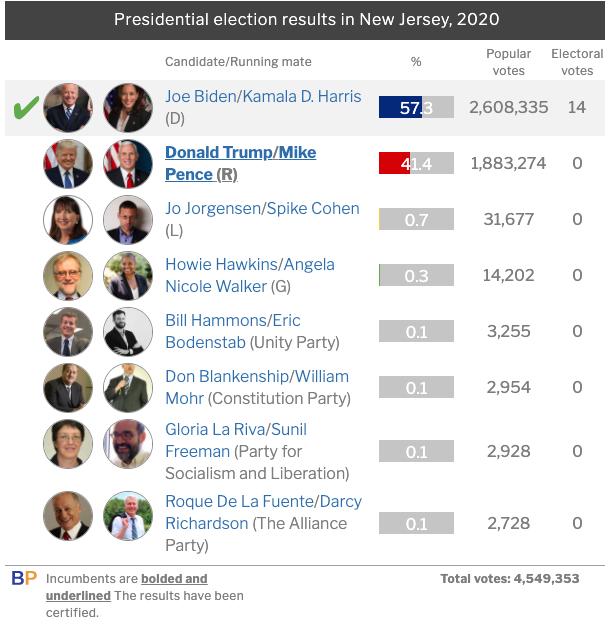

In [17]:
ballots_dataset.shape

(4370935, 30)

Total votes (ballotpedia.org) 4,549,353 <br>
Total votes (ballots_dataset) 4,370,935 <br>

Difference: 178,418

<hr>

### Voter Status ? What does it means?

In [13]:
ballots_dataset['voter_status'].value_counts()

Active                                  4347303
Active Federal Election Only              11436
Active Need ID                            10919
Deleted                                     924
Active Federal Election Only Need ID        180
Inactive Confirmation                       161
Incomplete                                    6
Rejected                                      4
Pending                                       2
Name: voter_status, dtype: int64

In [16]:
ballots_dataset[ballots_dataset['ballot_status']!='Rejected']['voter_status'].value_counts()

Active                                  4301764
Active Federal Election Only              11374
Active Need ID                             9735
Deleted                                     882
Active Federal Election Only Need ID        179
Inactive Confirmation                       149
Incomplete                                    5
Rejected                                      4
Pending                                       2
Name: voter_status, dtype: int64

<hr>

### voter_party or ballot_vtr_party?

In [21]:
ballots_dataset['voter_party'].value_counts()

Democratic                 1805561
Unaffiliated               1399475
Republican                 1128876
Libertarian                  10420
Conservative Party            7946
U.S. Constitution Party       6921
Green Party                   5426
Socialist Party               2929
Natural Law Party             2581
Reform Party                   800
Name: voter_party, dtype: int64

In [25]:
ballots_dataset['ballot_vtr_party'].value_counts()

Democratic                 1796580
Unaffiliated               1414925
Republican                 1120459
Libertarian                  10428
Conservative Party            8367
U.S. Constitution Party       7608
Green Party                   5732
Socialist Party               3136
Natural Law Party             2843
Reform Party                   857
Name: ballot_vtr_party, dtype: int64

<hr>

### voter_resAddr_city very different than ballot_addr_city -- Data is very dirty 1,000+ cities??<br> 
###  ballot_addr_city -> Ballot   Mailing   City

In [44]:
len((ballots_dataset['voter_resAddr_city'].str.lower()).unique())

924

In [40]:
len((ballots_dataset['ballot_addr_city'].str.lower()).unique())

11372

<hr>

### current_municipality vs ballot_municipality -> 26,774 records do not match

In [46]:
ballots_dataset['current_municipality'].value_counts()

Jersey City              87157
Newark City              64103
Hamilton Township        61736
Toms River Township      53404
Washington Township      53348
                         ...  
Walpack Township            10
Tavistock Borough            5
Ho-ho-Kus Borough            5
Sayerville Borough           1
Parsippany-Troy Hills        1
Name: current_municipality, Length: 550, dtype: int64

In [47]:
ballots_dataset['ballot_municipality'].value_counts()

Jersey City              87235
Newark City              64160
Hamilton Township        61645
Toms River Township      53609
Washington Township      53357
                         ...  
Mt. Olive Township           8
Ho-ho-Kus Borough            5
Tavistock Borough            5
Sayerville Borough           1
Parsippany-Troy Hills        1
Name: ballot_municipality, Length: 551, dtype: int64

In [50]:
ballots_dataset[ballots_dataset['current_municipality'].str.lower()!=ballots_dataset['ballot_municipality'].str.lower()]

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_city,ballot_addr_state,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_city,voter_resAddr_state,received_bearer
149,Atlantic,Weymouth Township,0,2.0,Single Election,D3856751791,Republican,Active,Regular,Atlantic,Absecon City,1,1,Republican,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/31/2020,11/20/2020,Accepted,NaN,75,HICKORY LN,MAYS LANDING,NJ,NaN
429,Atlantic,Hamilton Township,0,9.0,Single Election,F0354651823,Unaffiliated,Active,Regular,Atlantic,Absecon City,1,1,Unaffiliated,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/30/2020,11/20/2020,Accepted,NaN,1023,BLUEBIRD CIR,MAYS LANDING,NJ,NaN
430,Atlantic,Galloway Township,0,8.0,Single Election,F0365451823,Unaffiliated,Active,Regular,Atlantic,Absecon City,1,1,Republican,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/27/2020,2020-11-19,Rejected,Signature Does Not Match,718,RAVENWOOD DR,GALLOWAY,NJ,NaN
726,Atlantic,Hamilton Township,0,2.0,Single Election,P1527653915,Republican,Active,Regular,Atlantic,Absecon City,1,1,Republican,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/01/2020,2020-11-19,Rejected,Signature Does Not Match,2465,COLUMBIA RD,MAYS LANDING,NJ,NaN
729,Atlantic,Galloway Township,0,17.0,Single Election,A2301553940,Unaffiliated,Active,Regular,Atlantic,Absecon City,1,1,Unaffiliated,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/01/2020,11/20/2020,Accepted,NaN,18,CHEROKEE DR,GALLOWAY,NJ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4369204,Warren,Independence Township,0,1.0,Single Election,H0370852977,Unaffiliated,Active,Regular,Warren,White Township,0,3,Unaffiliated,BELVIDERE,NJ,US,08/14/2020,08/31/2020,Accepted,09/28/2020,10/29/2020,11/23/2020,Accepted,NaN,2,CHRISTINE RD,HACKETTSTOWN,NJ,NaN
4369213,Warren,Independence Township,0,1.0,Single Election,J5300053037,Republican,Active,Regular,Warren,White Township,0,3,Republican,BELVIDERE,NJ,US,08/14/2020,08/31/2020,Accepted,09/28/2020,10/29/2020,11/23/2020,Accepted,NaN,6,FERN DR,HACKETTSTOWN,NJ,NaN
4370320,Warren,Independence Township,0,2.0,Single Election,A5814253561,Unaffiliated,Active,Regular,Warren,White Township,0,5,Unaffiliated,Belvidere,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,11/02/2020,11/23/2020,Accepted,NaN,2,TOWPATH APARTMENTS,HACKETTSTOWN,NJ,NaN
4370388,Warren,Washington Borough,0,1.0,Single Election,A1269553937,Unaffiliated,Active,Regular,Warren,White Township,0,5,Republican,BELVIDERE,NJ,UNITED STATES,08/14/2020,08/31/2020,Accepted,09/28/2020,10/24/2020,11/23/2020,Accepted,NaN,21,PRESIDENTIAL DR,WASHINGTON,NJ,NaN


<hr>

### ballot_countedDate


In [58]:
ballots_dataset[(ballots_dataset['ballot_countedDate'].notna()) & (ballots_dataset['ballot_status']=='Rejected')]

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_city,ballot_addr_state,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_city,voter_resAddr_state,received_bearer
96,Atlantic,Absecon City,1,1.0,Single Election,D2726451787,Republican,Active,Regular,Atlantic,Absecon City,1,1,Democratic,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,2020-11-19,Rejected,Signature Does Not Match,533,N Shore Rd,Absecon,NJ,NaN
316,Atlantic,Absecon City,1,1.0,Single Election,E2481651808,Republican,Active,Regular,Atlantic,Absecon City,1,1,Republican,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Ballot Received After Deadline,45,Shady Ln,Absecon,NJ,NaN
348,Atlantic,Absecon City,1,1.0,Single Election,E3249551811,Libertarian,Active,Regular,Atlantic,Absecon City,1,1,Libertarian,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Ballot Received After Deadline,312,Spruce St,Absecon,NJ,NaN
430,Atlantic,Galloway Township,0,8.0,Single Election,F0365451823,Unaffiliated,Active,Regular,Atlantic,Absecon City,1,1,Republican,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/27/2020,2020-11-19,Rejected,Signature Does Not Match,718,RAVENWOOD DR,GALLOWAY,NJ,NaN
502,Atlantic,Absecon City,1,1.0,Single Election,B0672452839,Unaffiliated,Active,Regular,Atlantic,Absecon City,1,1,Unaffiliated,Absecon,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/28/2020,2020-11-19,Rejected,Signature Does Not Match,243,E Wyoming Ave,Absecon,NJ,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370627,Warren,White Township,0,6.0,Single Election,A6060952460,Republican,Active,Regular,Warren,White Township,0,6,Republican,Belvidere,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/17/2020,2020-11-19,Rejected,Certificate Not Signed,86,Summerfield Rd,Belvidere,NJ,NaN
4370731,Warren,White Township,0,6.0,Single Election,B1654652468,Democratic,Active,Regular,Warren,White Township,0,6,Democratic,Belvidere,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/07/2020,2020-11-19,Rejected,Certificate Missing,44,Colby Ct,Belvidere,NJ,NaN
4370744,Warren,White Township,0,6.0,Single Election,B1874552469,Republican,Active,Regular,Warren,White Township,0,6,Unaffiliated,Belvidere,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,11/05/2020,2020-11-19,Rejected,Certificate Missing,60,Castners Rd,Belvidere,NJ,NaN
4370874,Warren,White Township,0,6.0,Single Election,L1350653819,Republican,Active,Regular,Warren,White Township,0,6,Republican,Washington,NJ,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/12/2020,2020-11-23,Rejected,Signature Does Not Match,63,Spring Ln,Washington,NJ,NaN


<hr>

### ballot_municipality -> we do not have census data at that level...would be great if we do. Should we concentrate on some of the big cities?

In [65]:
(ballots_dataset['ballot_municipality'].str.lower()).unique()

array(['absecon city', 'atlantic city', 'brigantine city',
       'buena borough', 'buena vista township', 'corbin city',
       'egg harbor city', 'egg harbor township', 'estell manor city',
       'folsom borough', 'galloway township', 'hamilton township',
       'hammonton town', 'linwood city', 'longport borough',
       'margate city', 'mullica township', 'northfield city',
       'pleasantville city', 'port republic city', 'somers point city',
       'ventnor city', 'weymouth township', 'allendale borough',
       'alpine borough', 'bergenfield borough', 'bogota borough',
       'carlstadt borough', 'cliffside park borough', 'closter borough',
       'cresskill borough', 'demarest borough', 'dumont borough',
       'east rutherford borough', 'edgewater borough',
       'elmwood park borough', 'emerson borough', 'englewood city',
       'englewood cliffs borough', 'fair lawn borough',
       'fairview borough', 'fort lee borough', 'franklin lakes borough',
       'garfield city', 

In [78]:
ballots_dataset.groupby(['ballot_county','current_municipality']).agg({"current_municipality":"count"}).head(30)

current_municipality
ballot_county current_municipality                        
Atlantic      Absecon City                            5206
              Atlantic City                          12202
              Brigantine City                         5116
              Buena Borough                           2055
              Buena Vista Township                    3988
              Corbin City                              311
              Egg Harbor City                         1928
              Egg Harbor Township                    24629
              Estell Manor City                       1135
              Folsom Borough                          1060
              Galloway Township                      19523
              Hamilton Township                      14293
              Hammonton Town                          7463
              Linwood City                            4567
              Longport Borough                         632
              Margate City                            3733
              Mullica Township                        3323
              Northfield City                         5088
              Pleasantville City                      6331
              Port Republic City                       761
              Somers Point City                       5494
              Ventnor City                            4974
              Weymouth Township                       1726
Bergen        Allendale Borough                       4314
              Alpine Borough                           972
              Bergenfield Borough                    13072
              Bogota Borough                          4065
              Carlstadt Borough                       3223
              Cliffside Park Borough                  9227
              Closter Borough                         4554